## Import Necessary Libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
import joblib

## Load the Dataset

In [36]:
df = pd.read_csv('creditcard.csv')
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

## Exploratory Data Analysis

### Class Distribution

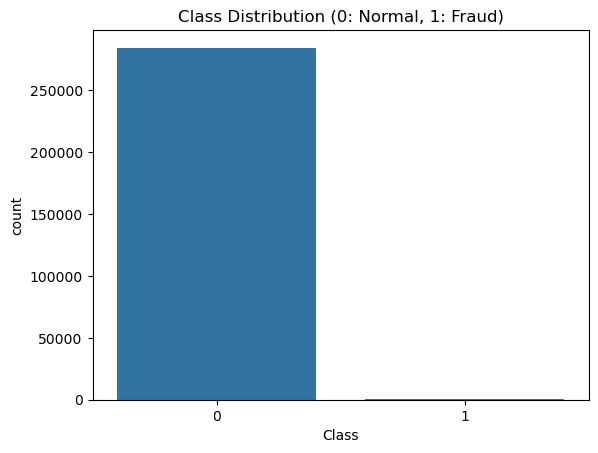

Class
0    284315
1       492
Name: count, dtype: int64


In [37]:
# Visualizing the class distribution (fraud vs non-fraud)
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Normal, 1: Fraud)')
plt.savefig('class_distribution.png',transparent=True)
plt.show()

# Print the distribution
print(df['Class'].value_counts())

In [38]:
print(df['Amount'].describe())

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


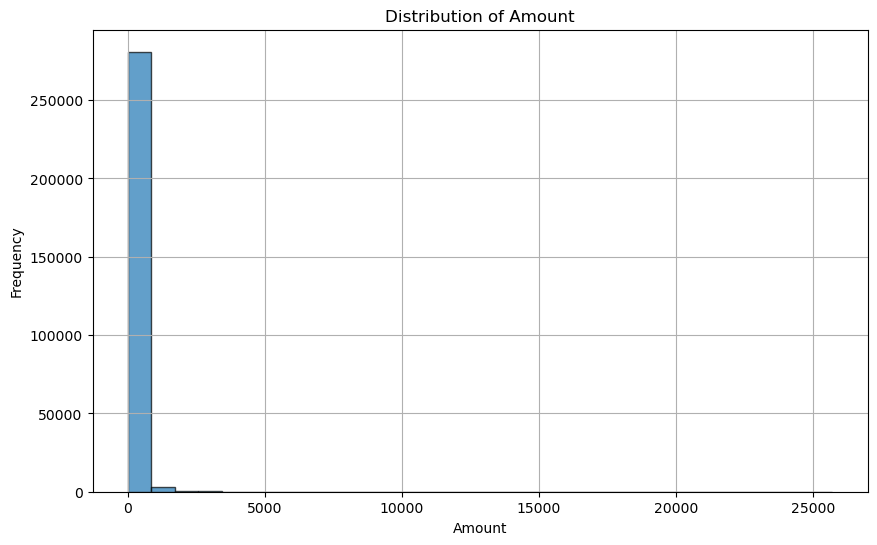

In [40]:
# Plot histogram of 'Amount'
plt.figure(figsize=(10, 6))
plt.hist(df['Amount'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('histogram_plot.png',transparent=True)
plt.show()

## Data Preprocessing

### Check for Missing Values

In [9]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Remove Duplicates

In [10]:
# Show the number of duplicates in the dataset
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 1081


In [11]:
df = df.drop_duplicates()

In [12]:
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


## Train-Test Split

In [14]:
# Separate the features and the target variable
X = df.drop(columns=['Class'])  # Features
y = df['Class']  # Target variable (0 for normal, 1 for fraud)

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Train the XGboost Model

In [15]:
# Initialize the classifier
xgboost = xgb.XGBClassifier(random_state=42)

# Train the model
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

## Feature Importances

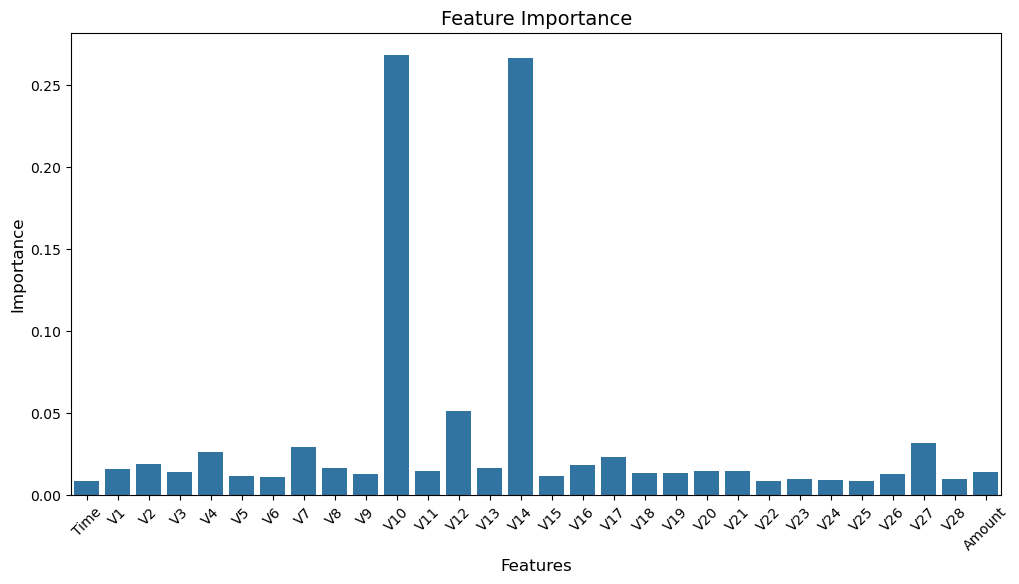

In [18]:
importances = xgboost.feature_importances_
features = X.columns
plt.figure(figsize=(12, 6))
sns.barplot(x=features, y=importances)
plt.title('Feature Importance', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.xticks(rotation=45)
plt.savefig("feature_importance.png", transparent=True)
plt.show()

## Model Evaluation

In [19]:
# Predict on the test data
y_pred = xgboost.predict(X_test)

In [22]:
# Evaluate the model
print("Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Model Evaluation:
Accuracy: 0.9995241955380115
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.96      0.75      0.84        95

    accuracy                           1.00     56746
   macro avg       0.98      0.87      0.92     56746
weighted avg       1.00      1.00      1.00     56746

Confusion Matrix:
[[56648     3]
 [   24    71]]


## Hyperparameter Tuning

### Fit the GridSearchCV to training data

In [23]:
# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=xgboost, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit the grid search
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

### Get the Most Optimal Hyperparameters

In [24]:
print("Best Parameters from GridSearchCV:", grid_search.best_params_)
print("Best Score from GridSearchCV:", grid_search.best_score_)

Best Parameters from GridSearchCV: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best Score from GridSearchCV: 0.9995946779451934


In [26]:
# retrieve the best model found by the grid search
best_model = grid_search.best_estimator_

### Feature Importances after Hyperparameter Tuning

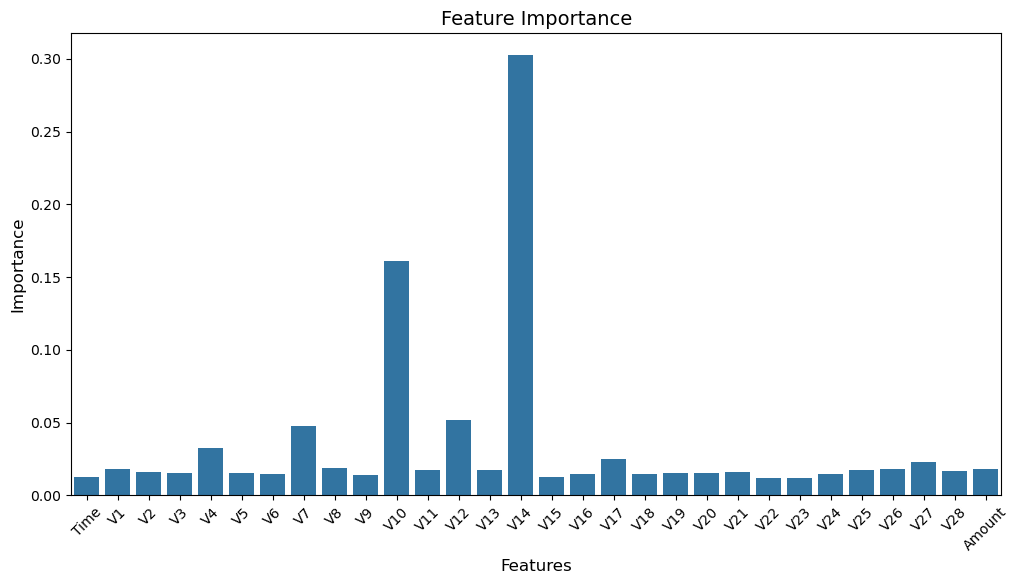

In [27]:
importances = best_model.feature_importances_
features = X.columns
plt.figure(figsize=(12, 6))
sns.barplot(x=features, y=importances)
plt.title('Feature Importance', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.xticks(rotation=45)
plt.savefig("feature_importance_tuned.png", transparent=True)
plt.show()

### Make Predictions and Evaluate the Model

In [28]:
y_pred_best = best_model.predict(X_test)

In [29]:
# Evaluate the tuned model
print("Tuned Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best)}")
print("Classification Report:")
print(classification_report(y_test, y_pred_best))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))

Tuned Model Evaluation:
Accuracy: 0.9995594403129736
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.99      0.75      0.85        95

    accuracy                           1.00     56746
   macro avg       0.99      0.87      0.93     56746
weighted avg       1.00      1.00      1.00     56746

Confusion Matrix:
[[56650     1]
 [   24    71]]


## Save the Model

In [34]:
import joblib
joblib.dump(best_model, 'fraud_detection_model.pkl')

['fraud_detection_model.pkl']